# Scaling and Normalizing

##### Author : Chintamani Madhukar Kasture

In [1]:
import pandas as pd
import numpy as np
# for Box_cox Tranformation which is done to transform 
#non-norman dependent variales isto normal shape
from scipy import stats

# for minmax scaling
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('ks-projects.csv')

In [3]:
dataset.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
dataset.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  The plots show a histogram of the values in the "usd_goal_real" column, both before and after scaling.  

In [5]:
# here we select usd_goal_real colums
original_data = pd.DataFrame(dataset.usd_goal_real)

scaled_data = minmax_scaling(original_data,columns=['usd_goal_real'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Data')

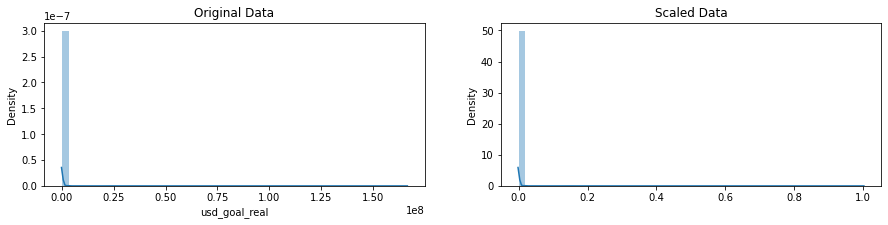

In [6]:
# plot

fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.distplot(dataset.usd_goal_real,ax = ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data,ax = ax[1])
ax[1].set_title('Scaled Data')

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [7]:
print('Original Data\nPreview:\n',original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('Scaled Data\nPreview:\n',scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))
print('_'*30)

Original Data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________
Scaled Data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0
______________________________


We just scaled the "usd_goal_real" column. What about the "goal" column?

In [8]:
# select usd_goal_real column
original_goal_data = pd.DataFrame(dataset.goal)

In [9]:
scaled_goal_data = minmax_scaling(original_goal_data,columns=['goal'])


In [10]:
print('Original Data\nPreview:\n',original_goal_data.head())
print('Minimum value:', float(original_goal_data.min()),
      '\nMaximum value:', float(original_goal_data.max()))
print('_'*30)

print('Scaled Data\nPreview:\n',scaled_goal_data.head())
print('Minimum value:', float(scaled_goal_data.min()),
      '\nMaximum value:', float(scaled_goal_data.max()))
print('_'*30)

Original Data
Preview:
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum value: 0.01 
Maximum value: 100000000.0
______________________________
Scaled Data
Preview:
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Minimum value: 0.0 
Maximum value: 1.0
______________________________


Now we will practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [11]:
# getting index value of all positive pledges
index_positive_pledges = dataset.usd_pledged_real>0

positive_pledges = dataset.usd_pledged_real.loc[index_positive_pledges]

normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                              name='usd_pledged_real',index=positive_pledges.index)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

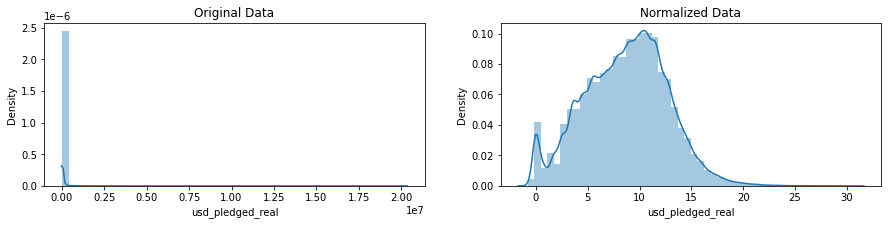

In [12]:
# plot to compare

fig,ax = plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges,ax = ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges,ax = ax[1])
ax[1].set_title('Normalized Data')

Now we will do this with pledge column as well

In [13]:
positive_pledge_index = dataset.pledged>0
positive_pledge = dataset.pledged.loc[positive_pledge_index]
normalized_pledge= pd.Series(stats.boxcox(positive_pledges)[0],
                              name='pledged',index = positive_pledge.index)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

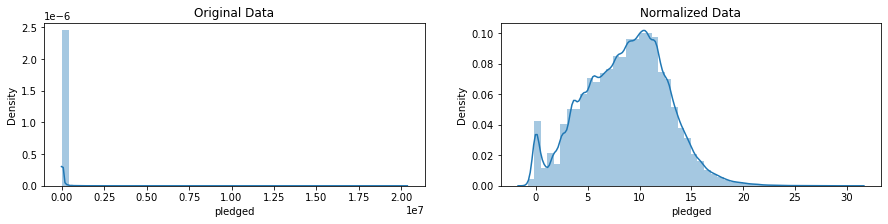

In [14]:
# plot to compare

fig,ax = plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledge,ax = ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledge,ax = ax[1])
ax[1].set_title('Normalized Data')

In [15]:
print('Original Data\nPreview:\n',positive_pledge.head())
print('Minimum value:', float(positive_pledge.min()),
      '\nMaximum value:', float(positive_pledge.max()))
print('_'*30)

print('Scaled Data\nPreview:\n',normalized_pledge.head())
print('Minimum value:', float(normalized_pledge.min()),
      '\nMaximum value:', float(normalized_pledge.max()))
print('_'*30)

Original Data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________
Scaled Data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: pledged, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361
______________________________
